In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load the demo dataset into a DataFrame
# Replace 'demo.csv' with the path to your dataset
df = pd.read_csv('demo.csv')
df

,math score,reading score,writing score,placement score,placement offer count,club join year
0,80,68,70,89,3,2019
1,71,61,85,91,3,2019
2,79,16,87,77,2,2018
3,61,77,74,76,2,2020
4,78,71,67,90,3,2019
5,73,68,90,80,2,2019
6,77,62,70,35,2,2020
7,74,45,80,12,1,2019
8,76,60,79,77,2,2020
9,75,65,85,87,3,2018


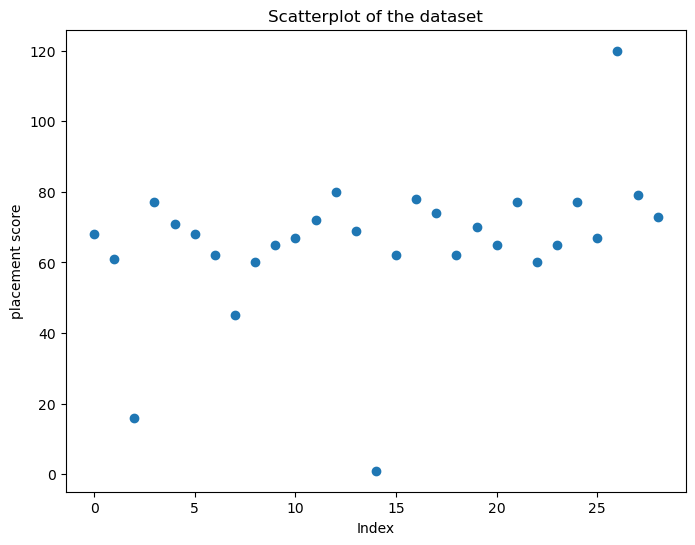

In [3]:

# Step 2: Detect outliers using a ScatterPlot
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['reading score'])
plt.title('Scatterplot of the dataset')
plt.xlabel('Index')
plt.ylabel('placement score')
plt.show()

In [4]:
'''# Step 3: Calculate the 10th and 90th percentiles
percentiles = df['placement score'].quantile([0.10, 0.90])
floor_value = percentiles[0.10]
cap_value = percentiles[0.90]'''

"# Step 3: Calculate the 10th and 90th percentiles\npercentiles = df['placement score'].quantile([0.10, 0.90])\nfloor_value = percentiles[0.10]\ncap_value = percentiles[0.90]"

In [5]:
'''# Step 4: Replace outliers with floor or cap values
df['placement score'] = df['placement score'].apply(lambda x: max(floor_value, min(x, cap_value)))
'''

"# Step 4: Replace outliers with floor or cap values\ndf['placement score'] = df['placement score'].apply(lambda x: max(floor_value, min(x, cap_value)))\n"

In [6]:
# Calculate the 10th and 90th percentile values for each column
percentiles = df.quantile([0.10, 0.90])

# Apply quantile-based flooring and capping
for column in df.columns:
    q10 = percentiles.loc[0.10, column]
    q90 = percentiles.loc[0.90, column]
    df[column] = df[column].apply(lambda x: q10 if x < q10 else (q90 if x > q90 else x))


In [7]:
# Display the DataFrame after handling outliers
print("DataFrame after handling outliers:")
print(df)

DataFrame after handling outliers:
    math score  reading score  writing score  placement score  \
0         80.0           68.0           70.0             89.0   
1         71.0           61.0           85.0             91.0   
2         79.0           57.0           87.0             77.0   
3         71.0           77.0           74.0             76.0   
4         78.0           71.0           67.0             90.0   
5         73.0           68.0           87.2             80.0   
6         77.0           62.0           70.0             67.0   
7         74.0           57.0           80.0             67.0   
8         76.0           60.0           79.0             77.0   
9         75.0           65.0           85.0             87.0   
10       104.0           67.0           66.2             83.0   
11        79.0           72.0           87.2             94.0   
12        80.0           78.2           78.0             94.0   
13        78.0           69.0           71.0           

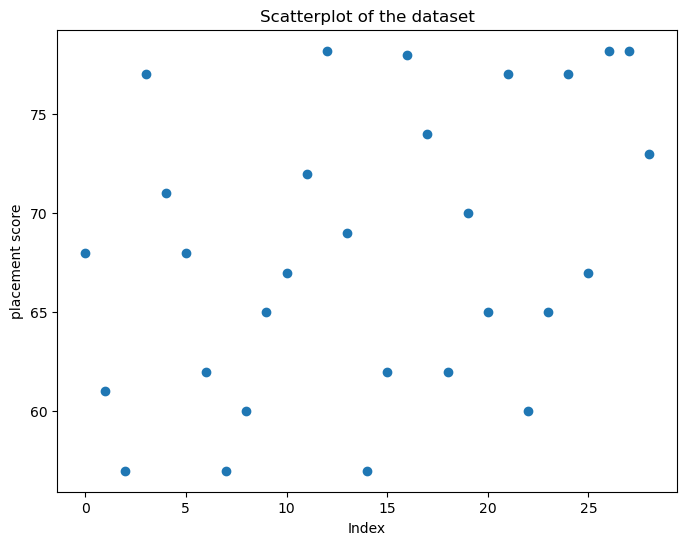

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['reading score'])
plt.title('Scatterplot of the dataset')
plt.xlabel('Index')
plt.ylabel('placement score')
plt.show()